# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [1]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [3]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 18.0MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 211MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 53.4MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 145MB/s]

100%|██████████| 170M/170M [00:01<00:00, 161MB/s]



# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 91.5ms
Speed: 0.7ms pre-process, 91.5ms inference, 1014.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


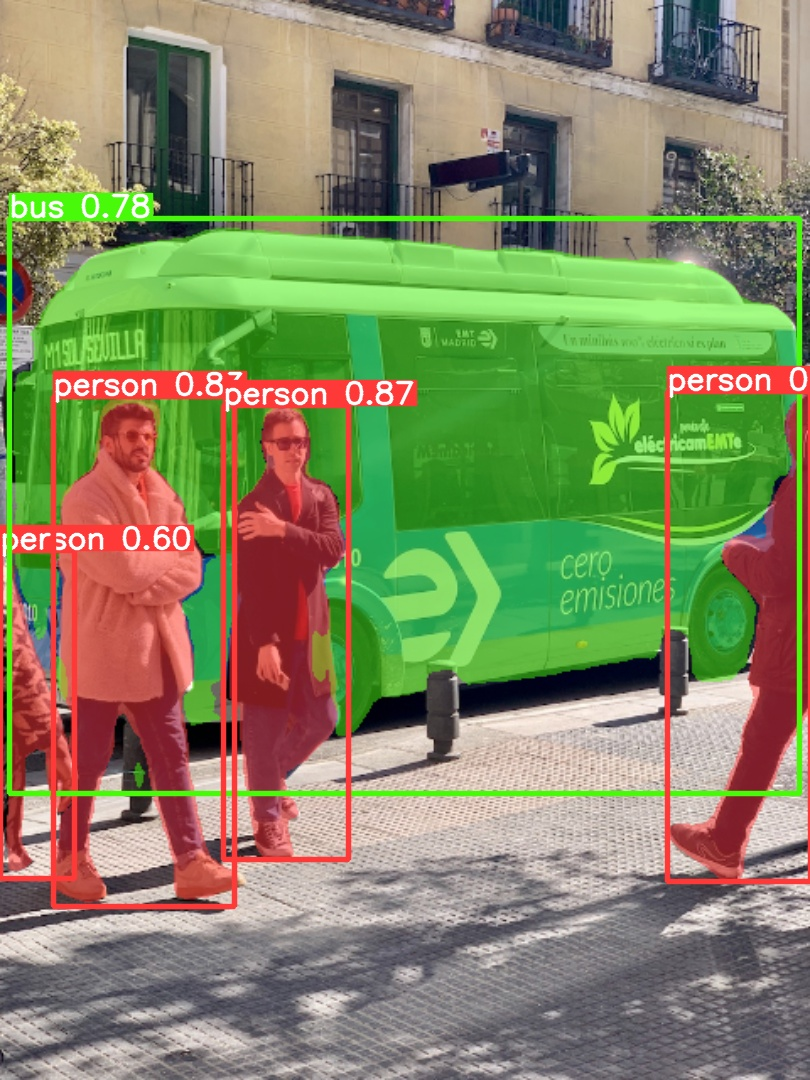

In [4]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

# 2. Infer on COCO image

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 497.4ms
Speed: 3.4ms pre-process, 497.4ms inference, 4.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco2


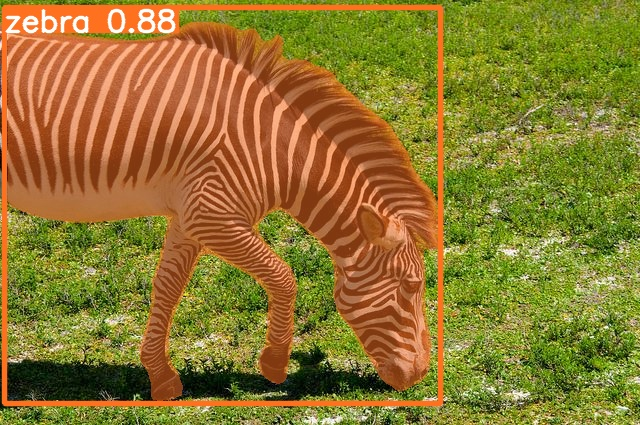

In [5]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [6]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 135MB/s]


replace /content/yolov5/datasets/coco128-seg/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [02:13<00:00, 33.33s/it]
                   all        128        929      0.707      0.652      0.711      0.487      0.674      0.628      0.662      0.403
Speed: 2

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [5]:
%cd {HOME}/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SJlmjzNZLyXV6FX1rsqg")
project = rf.workspace("for-the-fish").project("classification-of-common-freshwater-pet-store-fish-3dvvi")
version = project.version(4)
dataset = version.download("yolov5")

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unins

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Classification-of-Common-Freshwater-Pet-Store-Fish-4 in yolov5pytorch:: 100%|██████████| 1966/1966 [00:00<00:00, 6584.08it/s]


In [6]:
%cat {dataset.location}/data.yaml

names:
- Bala Shark
- Bristlenose Pleco
- Clown Loach
- Freshwater Angelfish
- Neon Tetra
- Silver Dollar
- Swordtail
nc: 7
roboflow:
  license: CC BY 4.0
  project: classification-of-common-freshwater-pet-store-fish-3dvvi
  url: https://universe.roboflow.com/for-the-fish/classification-of-common-freshwater-pet-store-fish-3dvvi/dataset/4
  version: 4
  workspace: for-the-fish
test: ../test/images
train: Classification-of-Common-Freshwater-Pet-Store-Fish-4/train/images
val: Classification-of-Common-Freshwater-Pet-Store-Fish-4/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [7]:
%cd {HOME}/yolov5
!python segment/train.py --img 128 --batch 128 --epochs 75 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset

/content/yolov5
2024-04-01 10:31:05.444875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 10:31:05.444975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 10:31:05.564537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/Classification-of-Common-Freshwater-Pet-Store-Fish-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=75, batch_size=128, imgsz=128, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, de

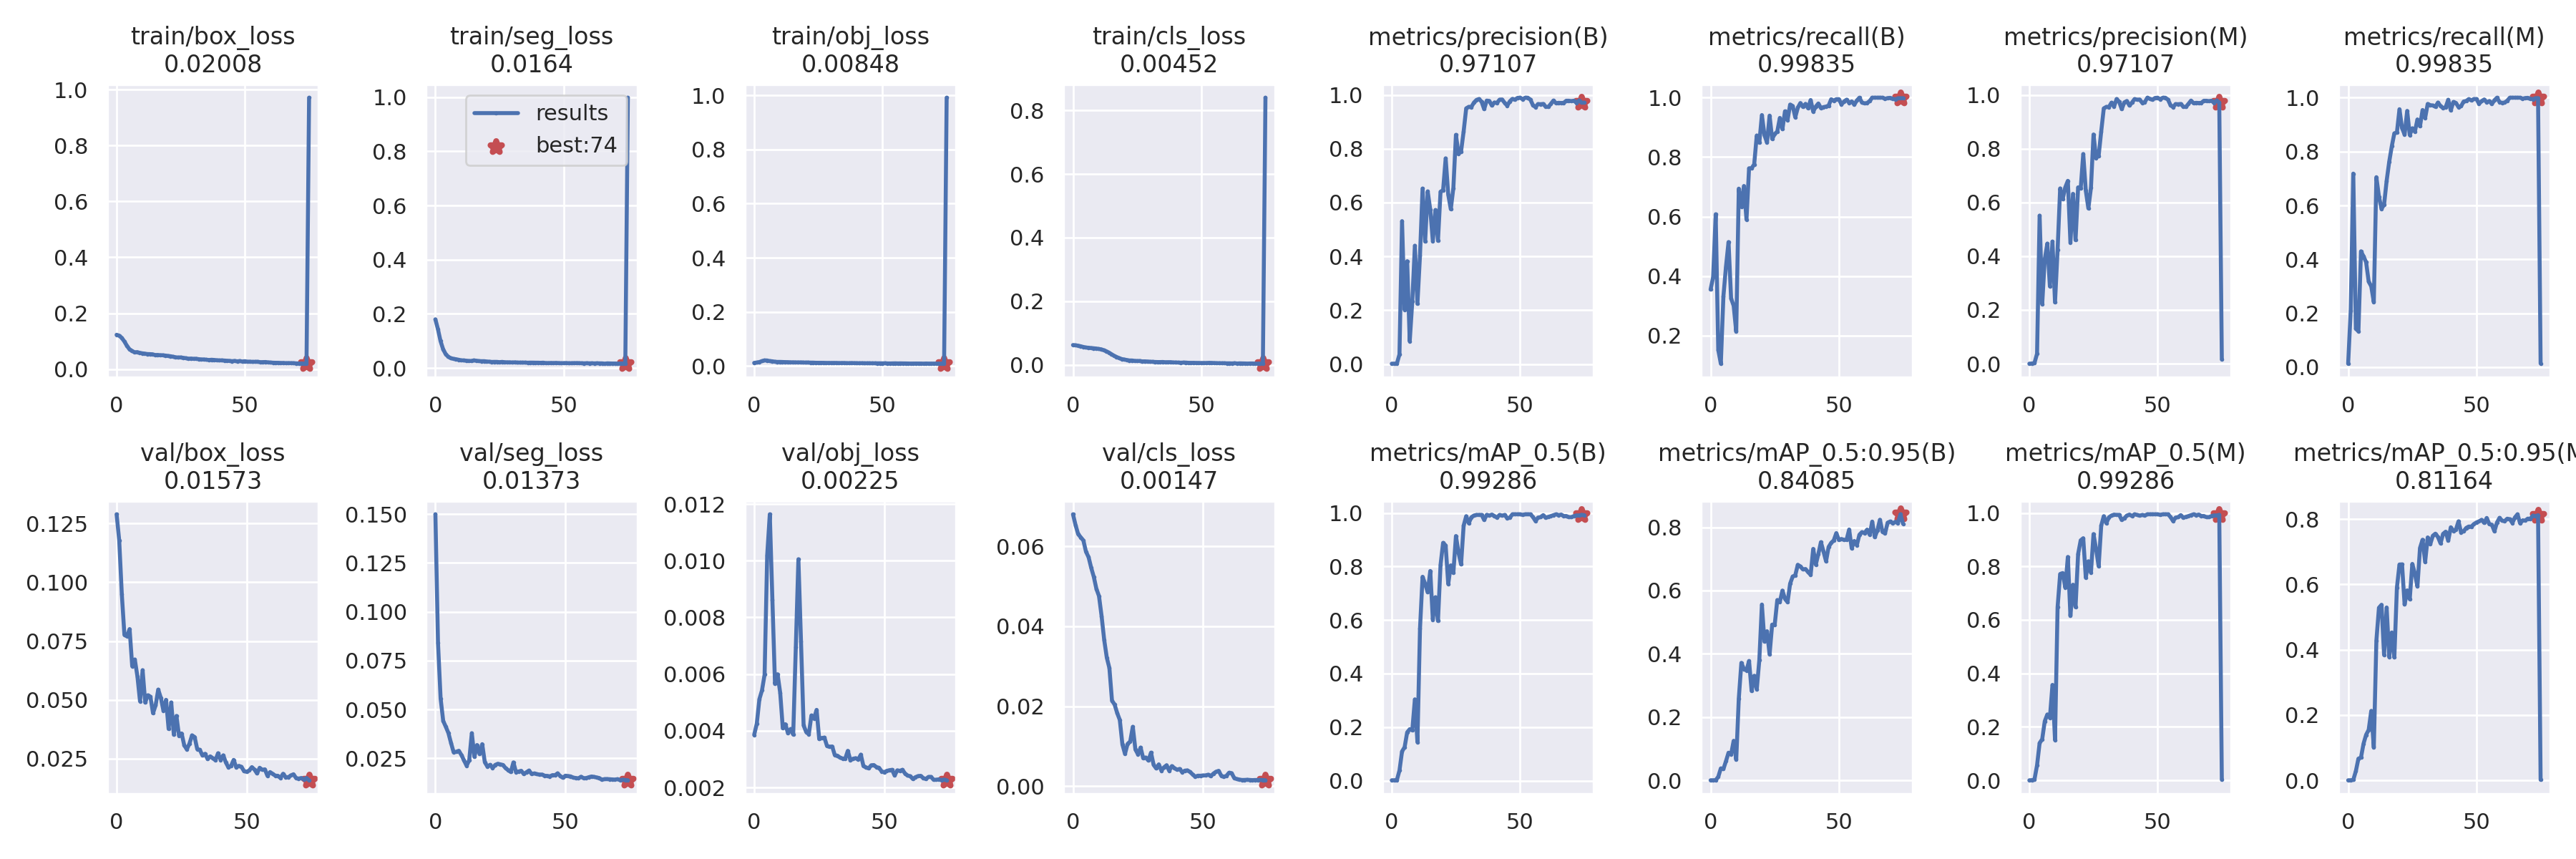

In [9]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

In [12]:
!zip -r custom-dataset.zip /content/yolov5/runs/train-seg/custom-dataset

  adding: content/yolov5/runs/train-seg/custom-dataset/ (stored 0%)
  adding: content/yolov5/runs/train-seg/custom-dataset/confusion_matrix.png (deflated 23%)
  adding: content/yolov5/runs/train-seg/custom-dataset/labels_correlogram.jpg (deflated 37%)
  adding: content/yolov5/runs/train-seg/custom-dataset/BoxPR_curve.png (deflated 22%)
  adding: content/yolov5/runs/train-seg/custom-dataset/MaskF1_curve.png (deflated 10%)
  adding: content/yolov5/runs/train-seg/custom-dataset/train_batch2.jpg (deflated 1%)
  adding: content/yolov5/runs/train-seg/custom-dataset/train_batch1.jpg (deflated 1%)
  adding: content/yolov5/runs/train-seg/custom-dataset/val_batch0_pred.jpg (deflated 14%)
  adding: content/yolov5/runs/train-seg/custom-dataset/MaskPR_curve.png (deflated 22%)
  adding: content/yolov5/runs/train-seg/custom-dataset/results.csv (deflated 85%)
  adding: content/yolov5/runs/train-seg/custom-dataset/MaskR_curve.png (deflated 12%)
  adding: content/yolov5/runs/train-seg/custom-dataset/hyp

In [13]:
from google.colab import files
files.download('custom-dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [15]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 128  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/Classification-of-Common-Freshwater-Pet-Store-Fish-4/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=128, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7414604 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Classification-of-Common-Freshwater-Pet-Store-Fish-4/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.0

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Classification-of-Common-Freshwater-Pet-Store-Fish-4/test/images/fa48_jpg.rf.2d4a258fdff5c257b8099783e4abc462.jpg, data=data/coco128.yaml, imgsz=[128, 128], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7414604 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Classification-of-Common-Freshwater-Pet-Store-Fish-4/test/images/fa48_jpg.rf.2d4a258fdff5c257b8099783e4abc462.jpg: 12

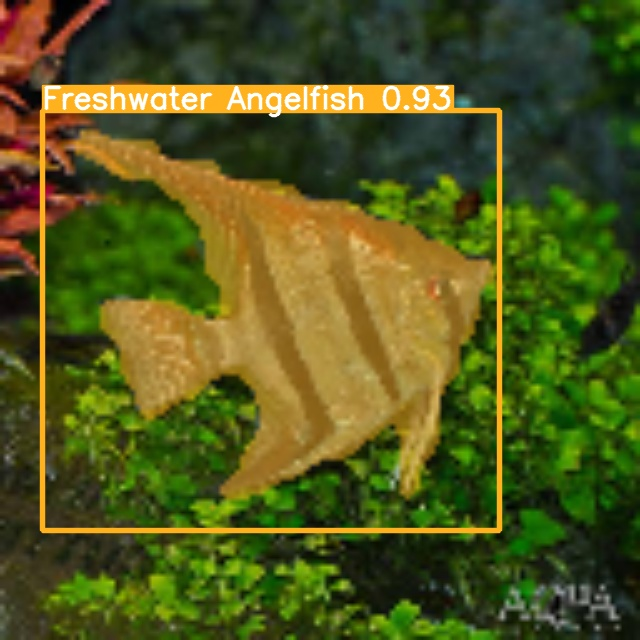

In [16]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 128 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.